In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import therpy as tp
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
twopi = np.pi * 2

The servers are not connected!
Using the local database copy. Could be outdated!
Internal Structure of therpy has changed.
Now all functions (except for helper functions and imageio functions) are stored at one place therpy.funcs and available on root as tp.####.
If there are errors in your program, simply replace tp.module_name.func_name to tp.func_name.
If some function is not present there, it must be a helper function and can be accessed via tp.funcs._____
If you would like to go back to old therpy, use pip install therpy==0.2.5 


In [2]:
# Constants 
bg_color = np.array([162, 193, 218]) / 256
bg_color = 'w'

# Box Shaking Animations 

## Ideal Box

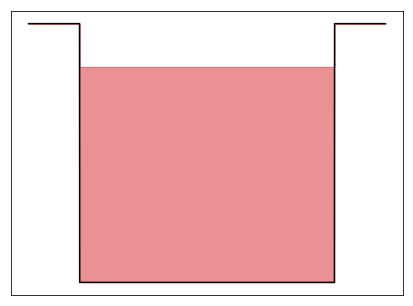

In [3]:
# Potential along z, u(z, t)
L = 100 
N = 5000
buffer = 20
u0 = 1.2
n0 = 1

x = np.linspace(-buffer, L+buffer, N)
u = np.zeros_like(x)
u[(x < 0) | (x > L)] = u0
n = np.zeros_like(x) + n0
n[u > n] = u[u > n]

fig, ax = plt.subplots(figsize=[6, 4.5])
plt.plot(x, u, 'k')
plt.fill_between(x, n, u, alpha=0.5, color='C3')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()

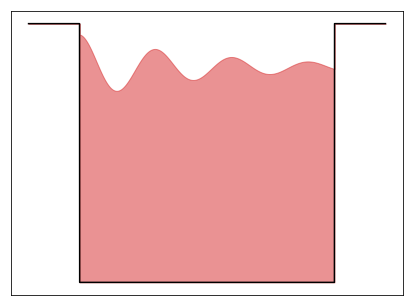

In [4]:
# Potential along z, u(z, t)
L = 100 
N = 5000
buffer = 20
u0 = 1.2
n0 = 1

shake_z = 5
shake_N = 25
shake_lambda = 30
shake_n0 = 0.15
shake_l = 50
i = shake_N * 4
x = np.linspace(-buffer, L+buffer, N)

u = np.zeros_like(x)
u[(x < np.sin(twopi*i/shake_N)*shake_z) | (x > L)] = u0
n = np.zeros_like(x) + n0
n = n + shake_n0 * np.exp(-x / shake_l) * np.sin(twopi * x / shake_lambda - twopi*i/shake_N + np.pi/2)
n[x > i / shake_N * shake_lambda] = n0
n[(x < np.sin(twopi*i/shake_N)*shake_z) | (x > L)] = u0

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()

p1 = plt.plot(x, u, 'k')
p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')


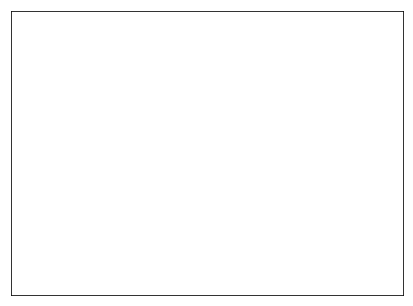

In [15]:
# Animation 

# Create list of artists for animation 

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()
artists = []

for i in range(int(shake_N*3.5)):
    # Generate Data 
    u = np.zeros_like(x)
    u[(x < np.sin(twopi*i/shake_N)*shake_z) | (x > L)] = u0
    n = np.zeros_like(x) + n0
    n = n + shake_n0 * np.exp(-x / shake_l) * np.sin(twopi * x / shake_lambda - twopi*i/shake_N + np.pi)
    n[x > i / shake_N * shake_lambda] = n0
    n[(x < np.sin(twopi*i/shake_N)*shake_z) | (x > L)] = u0
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

ani = animation.ArtistAnimation(fig, artists, interval=50, repeat_delay=2000, repeat=True, )
ani.save('IdealBoxShaking.gif',  writer='imagemagick')
HTML(ani.to_html5_video()) 

## Realistic Box

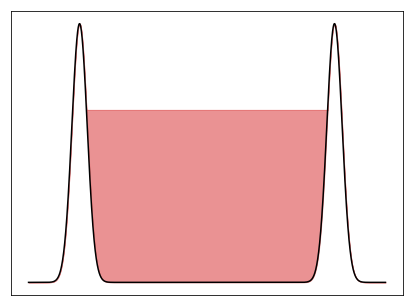

In [16]:
# Potential along z, u(z, t) 
L = 100 
N = 5000
buffer = 20
u0 = 1.5
n0 = 1
u_sigma = 3

x = np.linspace(-buffer, L+buffer, N)
u = np.zeros_like(x)
u = u0*np.exp(-(x - 0)**2/(2*u_sigma**2)) + u0*np.exp(-(x - L)**2/(2*u_sigma**2))
n = np.zeros_like(x) + n0
n[u > n] = u[u > n]
n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]


fig, ax = plt.subplots(figsize=[6, 4.5])
plt.plot(x, u, 'k')
plt.fill_between(x, n, u, alpha=0.5, color='C3')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()

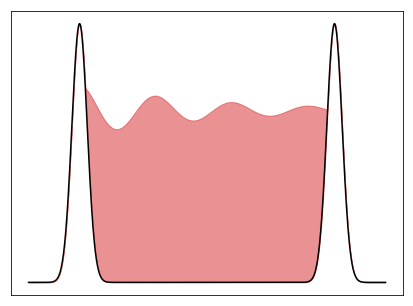

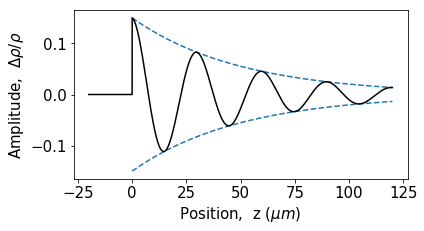

In [17]:
# Potential along z, u(z, t)
shake_amp = 0.3
shake_N = 25
shake_lambda = 30
shake_n0 = 0.15
shake_l = 50
i = 100

u = np.zeros_like(x)
u = (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - 0)**2/(2*u_sigma**2)) + u0*np.exp(-(x - L)**2/(2*u_sigma**2))
n = np.zeros_like(x) + n0
n = n + shake_n0 * np.exp(-x / shake_l) * np.sin(twopi * x / shake_lambda - twopi*i/shake_N + np.pi/2)
n[x > i / shake_N * shake_lambda] = n0
n[u > n] = u[u > n]
n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]

fig, ax = plt.subplots(figsize=[6, 4.5])
plt.plot(x, u, 'k')
plt.fill_between(x, n, u, alpha=0.5, color='C3')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()

delta_n = shake_n0 * np.exp(-x / shake_l) * np.cos(twopi * x / shake_lambda)
delta_n[(x < 0)] = 0
exp_n = shake_n0 * np.exp(-x / shake_l)
exp_n[x<0] = np.nan

fig, ax = plt.subplots(figsize=[6, 3.5])
ax.set(xlabel=r'Position,  z ($\mu m$)', ylabel=r'Amplitude,  $\Delta \rho / \rho$')
plt.tight_layout()
plt.plot(x, exp_n, '--C0')
plt.plot(x, -exp_n, '--C0')
plt.plot(x, delta_n, 'k')

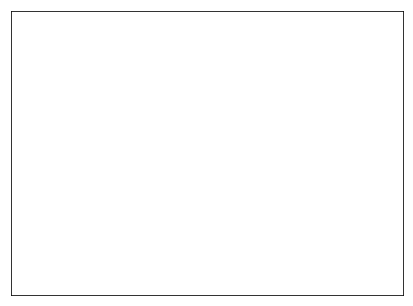

In [25]:
# Animation 

# Create list of artists for animation 

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()
artists = []

for i in range(int(shake_N*3.4)):
    # Generate Data 
    u = np.zeros_like(x)
    u = (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - 0)**2/(2*u_sigma**2)) + u0*np.exp(-(x - L)**2/(2*u_sigma**2))
    n = np.zeros_like(x) + n0
    n = n + shake_n0 * np.exp(-x / shake_l) * np.sin(twopi * x / shake_lambda - twopi*i/shake_N + np.pi)
    n[x > i / shake_N * shake_lambda] = n0
    n[u > n] = u[u > n]
    n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

ani = animation.ArtistAnimation(fig, artists, interval=50, repeat_delay=2000, repeat=True, )
ani.save('RealisticBoxShaking.gif',  writer='imagemagick')
HTML(ani.to_html5_video()) 

## Standing Waves

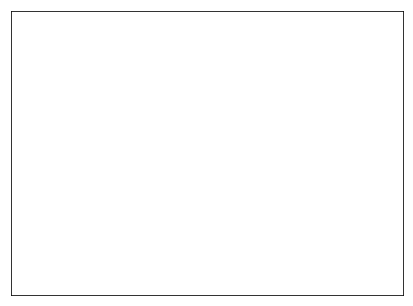

In [26]:
# Animation 

L = 100 
N = 5000
buffer = 20
u0 = 1.5
n0 = 1
u_sigma = 3

mode_num = 6

shake_amp = 0.3
shake_N = int(2/mode_num * 30)
shake_lambda = 2*L / mode_num
shake_n0 = 0.15
shake_l = 50
i = 100

x = np.linspace(-buffer, L+buffer, N)

# Create list of artists for animation 

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()
artists = []

for i in range(shake_N*1):
    # Generate Data 
    u = np.zeros_like(x)
    u = (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - 0)**2/(2*u_sigma**2)) + (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - L)**2/(2*u_sigma**2))
    n = np.zeros_like(x) + n0
    n = n + shake_n0 * np.sin(twopi * x / shake_lambda + np.pi/2) * np.sin(twopi * i / shake_N)
    n[u > n] = u[u > n]
    n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

ani = animation.ArtistAnimation(fig, artists, interval=100, repeat_delay=0, repeat=True, )
ani.save('ResonantMode{:.0f}.gif'.format(mode_num), dpi=80, writer='imagemagick')
HTML(ani.to_html5_video()) 

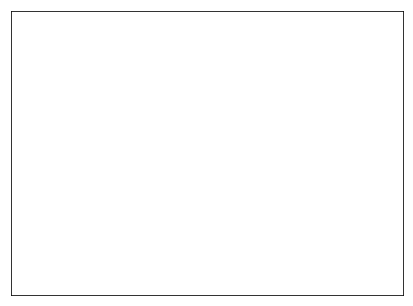

In [27]:
# Animation 

L = 100 
N = 5000
buffer = 20
u0 = 1.5
n0 = 1
u_sigma = 3

mode_num = 4

shake_amp = 0.3
shake_N = int(2/mode_num * 30)
shake_lambda = 2*L / mode_num
shake_n0 = 0.15
shake_decay = 2
i = 100

x = np.linspace(-buffer, L+buffer, N)

# Create list of artists for animation 

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()
artists = []

for i in range(shake_N*2):
    # Generate Data 
    u = np.zeros_like(x)
    u = (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - 0)**2/(2*u_sigma**2)) + (u0 + shake_amp * np.sin(twopi*i/shake_N))*np.exp(-(x - L)**2/(2*u_sigma**2))
    n = np.zeros_like(x) + n0
    n = n + shake_n0 * np.sin(twopi * x / shake_lambda + np.pi/2) * np.sin(twopi * i / shake_N)
    n[u > n] = u[u > n]
    n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

for i in range(shake_N*8):
    # Generate Data 
    u = np.zeros_like(x)
    u = (u0)*np.exp(-(x - 0)**2/(2*u_sigma**2)) + (u0)*np.exp(-(x - L)**2/(2*u_sigma**2))
    n = np.zeros_like(x) + n0
    n = n + shake_n0 * np.sin(twopi * x / shake_lambda + np.pi/2) * np.sin(twopi * i / shake_N) * np.exp(- i / shake_N / shake_decay)
    n[u > n] = u[u > n]
    n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

ani = animation.ArtistAnimation(fig, artists, interval=100, repeat_delay=0, repeat=True, )
ani.save('ResonantModeDecay{:.0f}.gif'.format(mode_num), writer='imagemagick')
HTML(ani.to_html5_video()) 

## Amplitude Build Up

In [70]:
# Function Definitions 
def step(x, x0):
    if x <= x0: return 0.0
    else: return 1.0
def istep(x, x0):
    if x >= x0: return 0.0
    else: return 1.0

step = np.vectorize(step, excluded='x0')
istep = np.vectorize(istep, excluded='x0')

def evens(x, t, n, T, G, L, k, w, c):
    return (t > n*T) * np.exp(- n * G * L) * np.exp(-G * x) * np.sin(k * x - w * (t - n * T)) * istep(x, c * (t - n * T))
def odds(x, t, n, T, G, L, k, w, c):
    return -1 * (t > n*T) * np.exp(- n * G * L) * np.exp(-G * (L - x)) * np.sin(- k * (x - L) - w * (t - n * T)) * step(x, L - c * (t - n * T))
def response(x, t, c=1, L=1, wl=1, dl=5, n=None):
    T = L/c
    k = twopi / wl
    w = twopi * c / wl
    G = 1.0 / dl
    if n is None: n = int(float(t) / T) + 1
    return np.sum([evens(x, t, ni, T, G, L, k, w, c) for ni in range(0, n, 2)], axis=0) + np.sum([odds(x, t, ni, T, G, L, k, w, c) for ni in range(1, n, 2)], axis=0)
def response_density(x, t, c=1, L=1, wl=1, dl=5, n=None):
    y = np.diff(response(x, t, c=c, L=L, wl=wl, dl=dl, n=n))
    return np.array(list(y) + [y[-1]])

In [96]:
# Animate the build up 
import ipywidgets
c0 = 1.0
L = 1
mode_num = 3
wl0 = 2 * L / mode_num
dl0 = 20 * L
f0 = c0 / wl0
omega0 = twopi * f0

x = np.linspace(-0.1, 1.1, 400)
def temp(t = 0.0):
    plt.plot(x, response_density(x, t, c0, L, wl0, dl0))
    plt.ylim([-10, 10])
    plt.xlim([0, 1])
    plt.show()
ip = ipywidgets.interact(temp,t=(0, 3.0, 0.1))

A Jupyter Widget

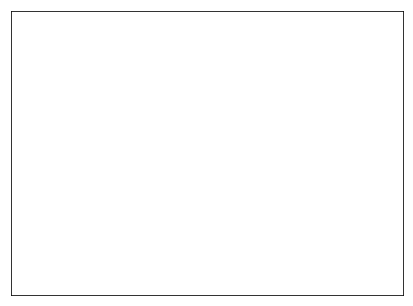

In [97]:
# Animation 
u_sigma = 0.03
# Create list of artists for animation 

fig, ax = plt.subplots(figsize=[6, 4.5])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
plt.tight_layout()
artists = []

for t in np.arange(0, 20, 0.05):
    # Generate Data 
    u = np.zeros_like(x)
    u = (u0 + shake_amp * np.sin(omega0 * t))*np.exp(-(x - 0)**2/(2*u_sigma**2)) + u0*np.exp(-(x - 1)**2/(2*u_sigma**2))
    n = np.zeros_like(x) + n0
    n = n - response_density(x, t, c0, L, wl0, dl0)
    n[u > n] = u[u > n]
    n[(x < 0) | (x > L)] = u[(x < 0) | (x > L)]
    
    # Make plot 
    p1 = ax.plot(x, u, 'k')[0]
    p2 = plt.fill_between(x, n, u, alpha=0.5, color='C3')
    artists.append([p1, p2])

ani = animation.ArtistAnimation(fig, artists, interval=50, repeat_delay=2000, repeat=True, )
ani.save('CavityModeBuildUp_{}.gif'.format(mode_num),  writer='imagemagick')
# HTML(ani.to_html5_video()) 

# Topic